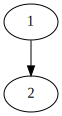

In [1]:
from graphviz import Digraph
# Create Digraph object
dot = Digraph()
# Add nodes 1 and 2
dot.node('1')
dot.node('2')

# Add edge between 1 and 2
dot.edges(['12'])
# Visualize the graph
dot

In [2]:
myDict = {}


class Node:
    nodenumber = 0

    def __init__(self, name):
        self.Name = name
        self.Predecessor = "Node cannot be Accessed"
        self.Distance = "Infinity"

        self.Adjacencylist = []

        myDict[self.Name] = Node.nodenumber  # Ordne dem Buchstaben einen Index zu (Hash)
        Node.nodenumber += 1





In [3]:
class Graph:

    def __init__(self):

        self.Nodes = []

    def addNodes(self, Nodearray):

        while (len(Nodearray) > 0):

            if myDict.get(Nodearray[0]) is None:  # Wenn Knoten nicht bereits geaddet
                self.Nodes.append(Node(Nodearray[0]))

            # Else: Knoten bereits vorhanden

            Nodearray = Nodearray[1:]  # "Delete" First Element

    def addEdges(self, Edgearray):

        for node1, node2 in Edgearray:  # Zugriff auf Linken und Rechten Teil des Paars

            node1_node = myDict.get(node1)  # Zugriff auf Index Knoten anstatt auf Namen
            node2_node = myDict.get(node2)  # None -> Knoten nicht hinzugefügt

            if node1_node is not None and node2_node is not None:
                if node2 not in self.Nodes[node1_node].Adjacencylist:
                    self.Nodes[node1_node].Adjacencylist.append(node2)

    def BFS(self, Startknoten):

        startindex = myDict.get(Startknoten)

        # myDict ist die Hashtabelle. "get" returned None wenn es den key Startknoten
        # nicht in der Hashtabelle gibt

        if startindex is None:
            print("Der Startknoten", Startknoten, "existiert nicht")
            return

        self.Nodes[startindex].Predecessor = "None (Start)"
        self.Nodes[startindex].Distance = 0

        Q = []

        visitednodes = []

        visitednodes.append(Startknoten)

        Q.append(Startknoten)

        while Q:

            u = Q[0]
            Q = Q[1:]
            

            u_node = self.Nodes[myDict[u]]  # u_node ist Knoten anstatt Name

            for Adjacent in u_node.Adjacencylist:

                if Adjacent not in visitednodes:
                    # get actual Objects with Names matching Adjacent
                    # u_node = self.Nodes [myDict [u] ]
                    Adjacent_node = self.Nodes[myDict[Adjacent]]

                    # set Dest Values
                    Adjacent_node.Predecessor = u_node.Name
                    Adjacent_node.Distance = u_node.Distance + 1

                    visitednodes.append(Adjacent_node.Name)
                    Q.append(Adjacent_node.Name)

        print("Die BFS Reihenfolge ist: ", visitednodes, "\n") # Reihenfolge des Besuchens (In welcher Reihenfolge sie "schwarz" gefärbt werden)

        print ("Daten für jeden Knoten ausgehen vom Startknoten",Startknoten, "\n")
        
        for Node in self.Nodes:
            print("Name:", Node.Name)
            print("Predecessor:", Node.Predecessor)
            print("Distance:", Node.Distance, "\n")
            
    def visualizegraph (self):
        
        dot = Digraph ()
        
        for Node in G.Nodes:
    
            if Node.Adjacencylist: # Knoten wird automatisch hinzugefügt, wenn man eine Kante mit dem Knoten hinzufügt
                for Adj in Node.Adjacencylist:
                
                    dot.edge (Node.Name, Adj)
        
            else: # Wenn der Knoten von sich aus hat, einfach Knoten alleine hinzufügen (Eventuell wird es zu einem Zielknoten in einer später zugefügten Kante)
                dot.node (Node.Name)
                
        dot
        

In [4]:

G = Graph ()

def main():
    #G = Graph()

    Nodearray = ['A', 'B', 'C', 'D', 'A', 'E', 'D', 'Peter']

    Edgearray = [('A', 'C'), ('B', 'A'), ('B', 'C'), ('C', 'B'), ('D', 'E'), ('A', 'C'), ('F', 'G'), ('A', 'E'), ('Peter', 'A')]

    G.addNodes(Nodearray)

    G.addEdges(Edgearray)

    #for Node in G.Nodes:
        #print("Adjacencylist von", Node.Name, "ist:", Node.Adjacencylist)

    G.BFS('A')  # Startknoten = 'A' (z.B)
    
    G.visualizegraph ()
    


if __name__ == "__main__":
    main()

Die BFS Reihenfolge ist:  ['A', 'C', 'E', 'B'] 

Daten für jeden Knoten ausgehen vom Startknoten A 

Name: A
Predecessor: None (Start)
Distance: 0 

Name: B
Predecessor: C
Distance: 2 

Name: C
Predecessor: A
Distance: 1 

Name: D
Predecessor: Node cannot be Accessed
Distance: Infinity 

Name: E
Predecessor: A
Distance: 1 

Name: Peter
Predecessor: Node cannot be Accessed
Distance: Infinity 



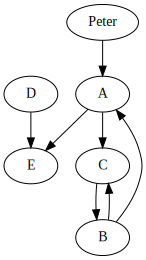

In [5]:
dot = Digraph ()
        
for Node in G.Nodes:
    
    #dot.node (Node.Name)
    
    if Node.Adjacencylist: # Knoten wird automatisch hinzugefügt, wenn man eine Kante mit dem Knoten hinzufügt
        for Adj in Node.Adjacencylist:
                
            dot.edge (Node.Name, Adj)
        
    else: # Wenn der Knoten von sich aus hat, einfach Knoten alleine hinzufügen
        dot.node (Node.Name)
                
dot